In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')

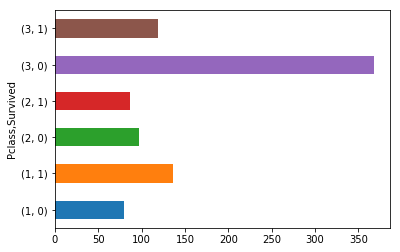

In [22]:
df.groupby(['Pclass','Survived']).Sex.count().plot(kind="barh")

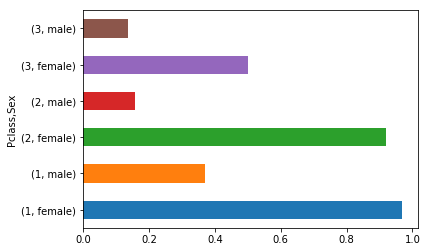

In [25]:
df.groupby(['Pclass', 'Sex']).Survived.mean().plot(kind="barh")

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

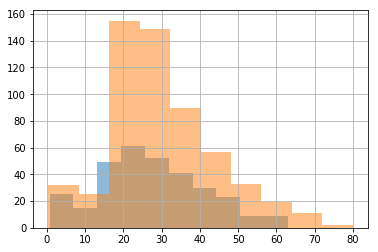

In [30]:
df.groupby(['Sex']).Age.hist(alpha=0.5)

In [35]:
df[df.Age.between(0,10)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
10,1,3,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.7000
16,0,3,Master. Eugene Rice,male,2.0,4,1,29.1250
24,0,3,Miss. Torborg Danira Palsson,female,8.0,3,1,21.0750
42,1,2,Miss. Simonne Marie Anne Andree Laroche,female,3.0,1,2,41.5792


In [36]:
# Średnia cena biletu w klasie?
# Średnia cena biletu meżczyzna/kobieta?

In [48]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


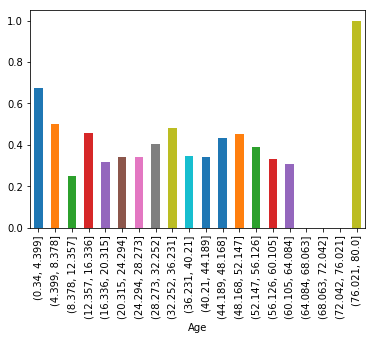

In [51]:
df.groupby(pd.cut(df.Age, 20)).Survived.mean().plot(kind='bar')

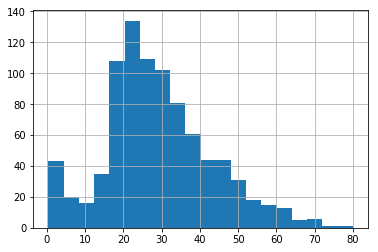

In [52]:
df.Age.hist(bins=20)

In [59]:
def wybierz_tytul(imie):
    return imie.split()[0]

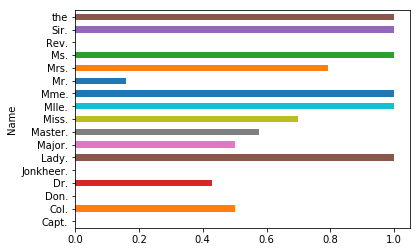

In [64]:
df.groupby(df.Name.apply(wybierz_tytul)).Survived.mean().plot(kind="barh")

In [65]:
def wybierz_tytul(imie):
    tytul = imie.split()[0]
    if tytul == "the":
        print(imie)
    return tytul

In [88]:
dfr = df.Name.apply(lambda s: s.split()[-1]).value_counts()

In [93]:
dfr[dfr>6]

Andersson    9
Sage         7
Name: Name, dtype: int64

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

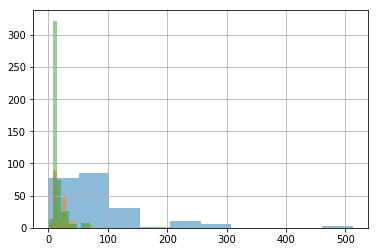

In [97]:
df.groupby("Pclass").Fare.hist(alpha=0.5)

In [101]:
df.groupby("Pclass").Fare.agg(['mean', 'std'])

,mean,std
Pclass,,
1,84.154687,78.380373
2,20.662183,13.417399
3,13.707707,11.817309


In [102]:
df[df.Fare > 200]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
27,0,1,Mr. Charles Alexander Fortune,male,19.0,3,2,263.0000
87,1,1,Miss. Mabel Helen Fortune,female,23.0,3,2,263.0000
117,0,1,Mr. Quigg Edmond Baxter,male,24.0,0,1,247.5208
257,1,1,Miss. Anna Ward,female,35.0,0,0,512.3292
297,1,1,Mrs. James (Helene DeLaudeniere Chaput) Baxter,female,50.0,0,1,247.5208
309,1,1,Miss. Emily Borie Ryerson,female,18.0,2,2,262.3750
339,1,1,Miss. Alice Elizabeth Fortune,female,24.0,3,2,263.0000
375,0,1,Mr. Harry Elkins Widener,male,27.0,0,2,211.5000
378,1,1,Miss. Rosalie Bidois,female,42.0,0,0,227.5250
435,0,1,Mr. Mark Fortune,male,64.0,1,4,263.0000


In [144]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [119]:
X = df.drop(columns=['Name', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Survived', 'Sex'])
X = X.values

In [123]:
y = df.Survived.values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [149]:
clf = GradientBoostingClassifier()

In [150]:
clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [151]:
y_pred = clf.predict(X_test)

In [152]:
(y_pred == y_test).mean()

0.702247191011236

In [153]:
1 - y_test.mean()

0.5674157303370786